# Technical Support Data Analysis
`Technical support data` can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome technical challenge quickly with minimal effort.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
tech_supp_df = pd.read_csv('technical_support_data-2.csv')
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [3]:
tech_supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [4]:
tech_supp_df.shape

(23, 8)

In [5]:
techSuppAttr = tech_supp_df.iloc[:,1:] # separate problem type from attributes
techSuppScaled = techSuppAttr.apply(zscore) # make unitless to see how many standard deviations away from mean

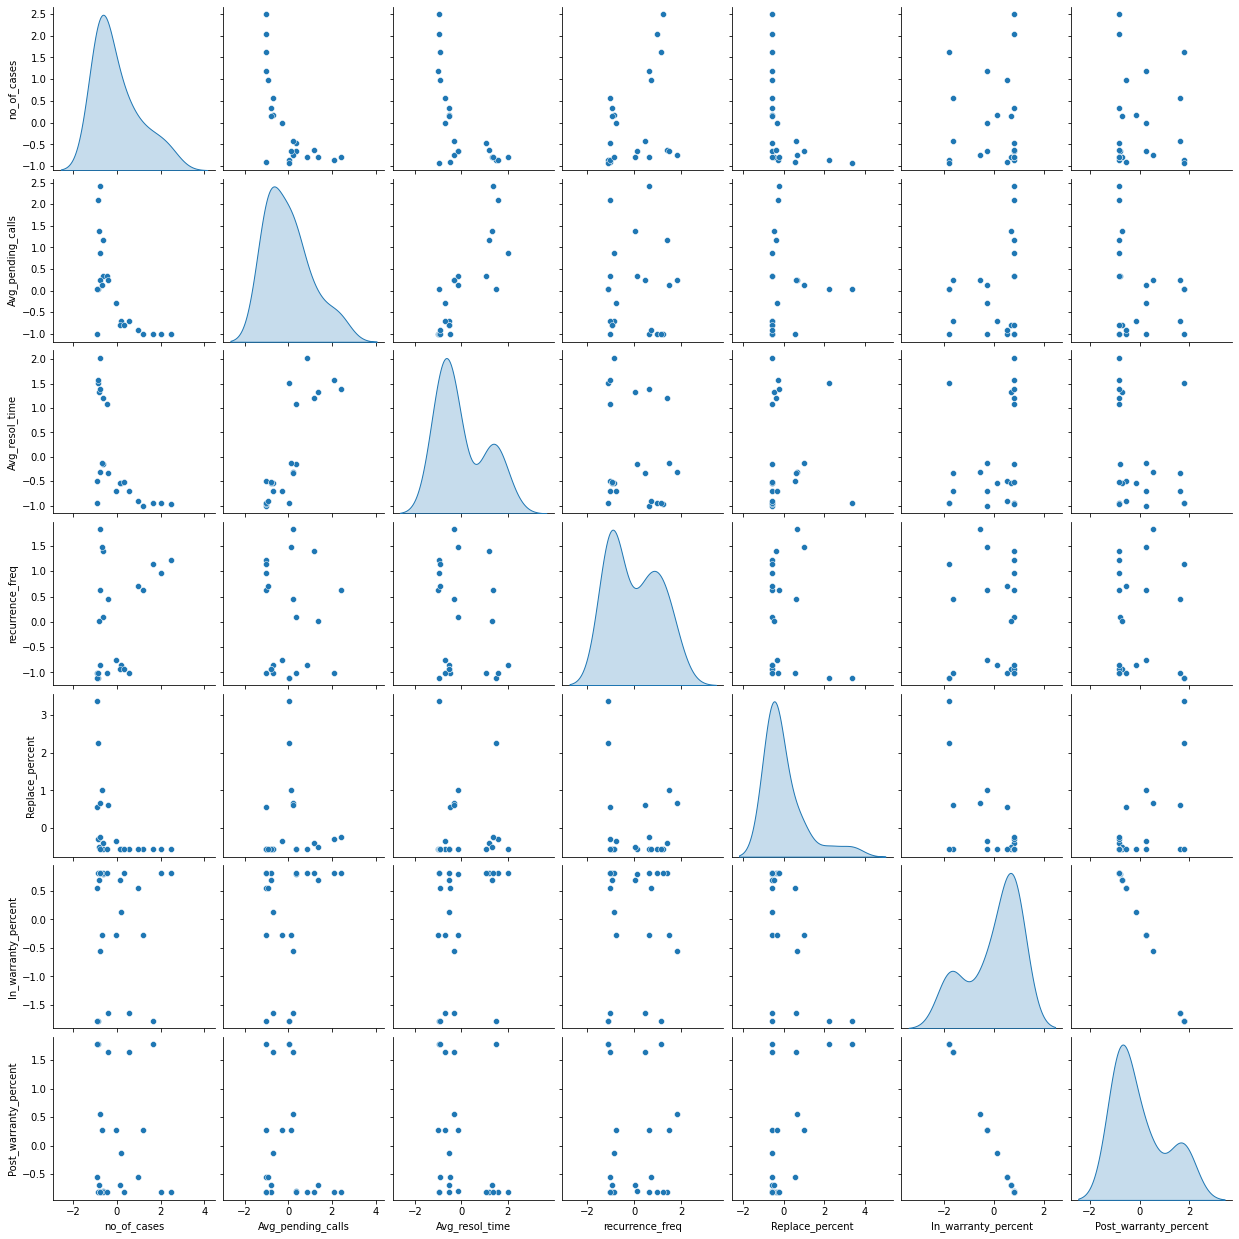

In [6]:
sns.pairplot(techSuppScaled,diag_kind='kde')

### Grouping/Clustering `PROBLEM_TYPE`

In [7]:
# finding optimal number of clusters
from scipy.spatial.distance import cdist # computing distance between each pair

### Elbow Method

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

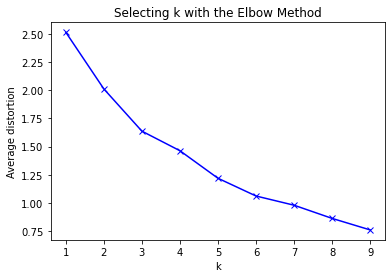

In [8]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k) # model object
    model.fit(techSuppScaled) # fit the model
    prediction=model.predict(techSuppScaled) # making predictions
    # taking minimum distortions
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Further analysis from subjectively taking `K` by seeing sharp turns in the curve - `Elbow Method`.

### `K = 3`

In [9]:
final_model = KMeans(3)
final_model.fit(techSuppScaled)
pred = final_model.predict(techSuppScaled)

In [10]:
# append to the data frame
tech_supp_df['GROUP'] = pred # for seeing difference, original data frame
techSuppScaled['GROUP'] = pred # for scale difference for box plot
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [11]:
techSuppScaled.groupby(by=['GROUP']).describe()

no_of_cases                                                              \
            count      mean       std       min       25%       50%       75%   
GROUP                                                                           
0             6.0 -0.721537  0.146207 -0.862176 -0.794603 -0.786363 -0.669347   
1            10.0  0.574316  1.091076 -0.908323  0.022859  0.255242  1.123795   
2             7.0 -0.201991  0.954936 -0.921508 -0.806140 -0.657810  0.073950   

                Avg_pending_calls            ... In_warranty_percent  \
            max             count      mean  ...                 75%   
GROUP                                        ...                       
0     -0.466630               6.0  1.379794  ...            0.822449   
1      2.486781              10.0 -0.722017  ...            0.815605   
2      1.629764               7.0 -0.151228  ...           -1.093821   

                Post_warranty_percent                                          \
            max                 count      mean       std       min       25%   
GROUP                                                                           
0      0.822449                   6.0 -0.799636  0.055880 -0.822449 -0.822449   
1      0.822449                  10.0 -0.463833  0.440932 -0.822449 -0.815605   
2     -0.272563                   7.0  1.348020  0.648918  0.272563  1.093821   

                                     
            50%       75%       max  
GROUP                                
0     -0.822449 -0.822449 -0.685572  
1     -0.617134 -0.240724  0.272563  
2      1.641327  1.778204  1.778204  

[3 rows x 56 columns]

In [12]:
techSuppScaled.groupby(by=['GROUP']).mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,-0.721537,1.379794,1.435604,-0.139282,-0.421098,0.799636,-0.799636
1,0.574316,-0.722017,-0.677281,-0.084694,-0.426712,0.463833,-0.463833
2,-0.201991,-0.151228,-0.262973,0.240375,0.970530,-1.348020,1.348020


In [13]:
tech_supp_df.groupby(by=['GROUP']).mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,33.333333,3.300000,145.666667,0.121667,0.025000,99.166667,0.833333
1,229.900000,1.280000,24.000000,0.128000,0.024000,86.900000,13.100000
2,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

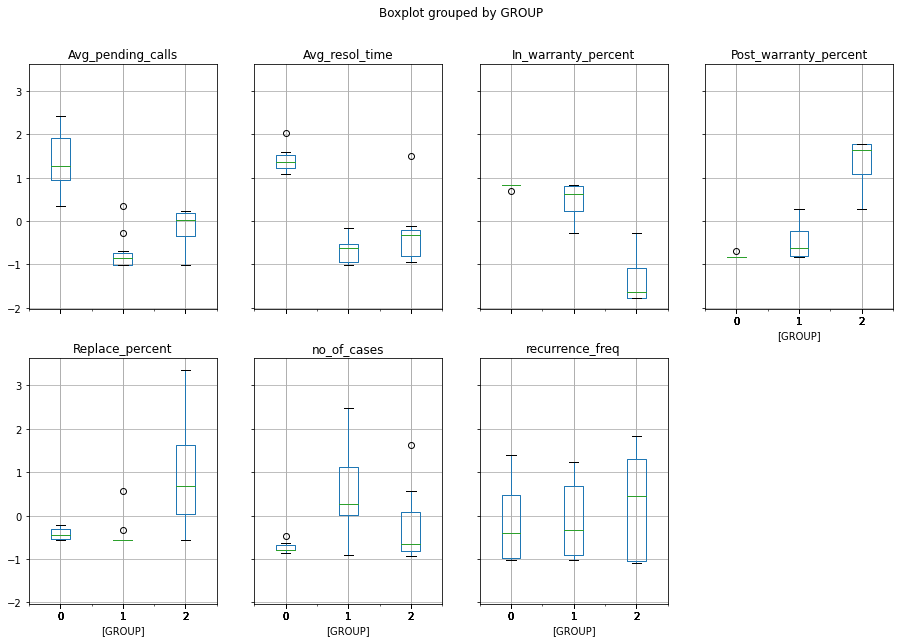

In [14]:
techSuppScaled.boxplot(by='GROUP',layout=(2,4),figsize=(15,10))

### `K = 5`

In [15]:
final_model = KMeans(n_clusters=5)
final_model.fit(techSuppScaled)
pred = final_model.predict(techSuppScaled)

In [16]:
# append to the data frame
tech_supp_df['GROUP'] = pred # for seeing difference, original data frame
techSuppScaled['GROUP'] = pred # for scale difference for box plot
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,3
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,3
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,3


In [17]:
techSuppScaled.groupby(by=['GROUP']).describe()

no_of_cases                                                              \
            count      mean       std       min       25%       50%       75%   
GROUP                                                                           
0             2.0 -0.891842  0.041954 -0.921508 -0.906675 -0.891842 -0.877009   
1             4.0  1.664375  0.713596  0.970521  1.123795  1.600099  2.140678   
2             6.0 -0.721537  0.146207 -0.862176 -0.794603 -0.786363 -0.669347   
3             6.0 -0.152390  0.502959 -0.908323 -0.488055  0.064061  0.171188   
4             5.0  0.073950  1.016999 -0.750104 -0.657810 -0.427075  0.574975   

                Avg_pending_calls            ... In_warranty_percent  \
            max             count      mean  ...                 75%   
GROUP                                        ...                       
0     -0.862176               2.0  0.027143  ...           -1.778204   
1      2.486781               4.0 -0.987344  ...            0.822449   
2     -0.466630               6.0  1.379794  ...            0.822449   
3      0.331055               6.0 -0.545132  ...            0.767698   
4      1.629764               5.0 -0.222577  ...           -0.546316   

                Post_warranty_percent                                          \
            max                 count      mean       std       min       25%   
GROUP                                                                           
0     -1.778204                   2.0  1.778204  0.000000  1.778204  1.778204   
1      0.822449                   4.0 -0.480258  0.518206 -0.822449 -0.822449   
2      0.822449                   6.0 -0.799636  0.055880 -0.822449 -0.822449   
3      0.822449                   6.0 -0.452882  0.434138 -0.822449 -0.767698   
4     -0.272563                   5.0  1.175947  0.708592  0.272563  0.546316   

                                     
            50%       75%       max  
GROUP                                
0      1.778204  1.778204  1.778204  
1     -0.685572 -0.343381  0.272563  
2     -0.822449 -0.822449 -0.685572  
3     -0.617134 -0.240724  0.272563  
4      1.641327  1.641327  1.778204  

[5 rows x 56 columns]

In [18]:
tech_supp_df.groupby(by=['GROUP']).mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,7.500000,2.000,79.000000,0.010000,0.600,5.000000,95.000000
1,395.250000,1.025,7.750000,0.240000,0.000,87.500000,12.500000
2,33.333333,3.300,145.666667,0.121667,0.025,99.166667,0.833333
3,119.666667,1.450,34.833333,0.053333,0.040,86.500000,13.500000
4,154.000000,1.760,35.400000,0.228000,0.142,27.000000,73.000000


In [19]:
techSuppScaled.groupby(by=['GROUP']).mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,-0.891842,0.027143,0.277859,-1.101765,2.807317,-1.778204,1.778204
1,1.664375,-0.987344,-0.959481,0.880663,-0.561463,0.480258,-0.480258
2,-0.721537,1.379794,1.435604,-0.139282,-0.421098,0.799636,-0.799636
3,-0.152390,-0.545132,-0.489147,-0.728264,-0.336878,0.452882,-0.452882
4,0.073950,-0.222577,-0.479306,0.777232,0.235815,-1.175947,1.175947


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

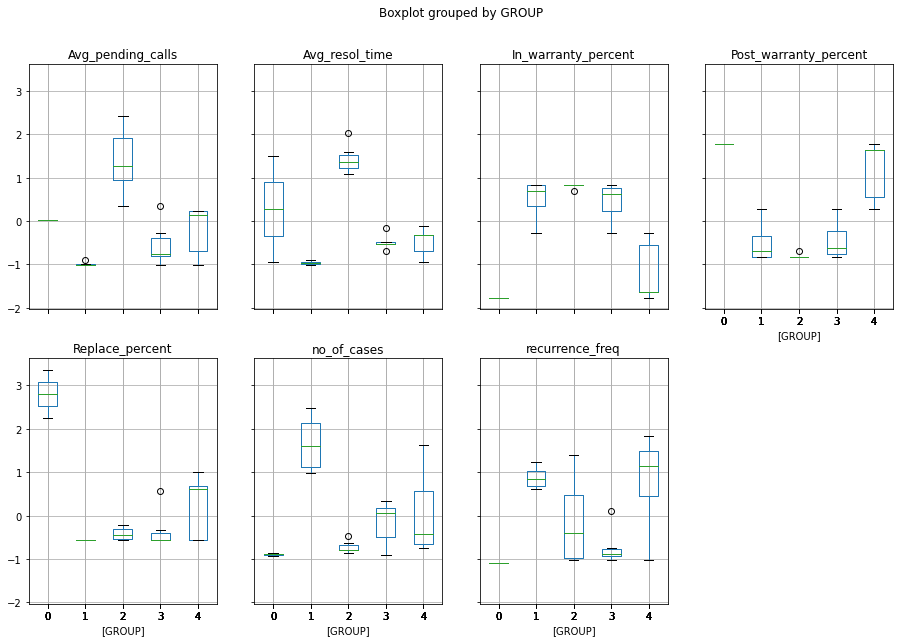

In [20]:
techSuppScaled.boxplot(by='GROUP',layout=(2,4),figsize=(15,10))